In [1]:
!pip install -q lxml

import bs4
import lxml
import pandas as pd
import urllib

from urllib import request

/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point


In [2]:
pip install requests


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

In [84]:
# Récupérer la page web
url = "https://fr.wikipedia.org/wiki/Liste_de_noms_de_couleur"
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

rows = soup.find_all('tr')

colors_data = []

for row in rows:
    cols = row.find_all('td')
    
    if len(cols) > 6:  # Vérifier qu'il y a assez de colonnes pour les informations RGB
        color_name = cols[0].get_text(strip=True).lower()  # Nom de la couleur
        rgb_values = [cols[7].get_text(strip=True), cols[8].get_text(strip=True), cols[9].get_text(strip=True)]  # RGB
        
        # Vérifier si les RGB sont valides (non vides)
        try:
            rgb_values = tuple(map(int, rgb_values))
            colors_data.append([color_name, rgb_values])
        except ValueError:
            continue  # Si les RGB ne sont pas valides, ignorer cette ligne


df_colors = pd.DataFrame(colors_data, columns=["Color", "RGB"])
df_colors.to_csv("couleurs.csv", index=False, encoding="utf-8")
print(df_colors.head())

          Color             RGB
0       abricot    (126, 48, 0)
1        acajou     (66, 29, 0)
2  aigue-marine  (248, 248, 51)
3        amande  (196, 108, 34)
4      amarante     (40, 59, 0)


In [62]:
url = "https://fr.wikipedia.org/wiki/Liste_de_tissus"

response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    
    tissus = []

    headings = soup.find_all("div", class_="mw-heading mw-heading2")
    for heading in headings:
        # Le <ul> suivant contient la liste des tissus pour cette section
        ul = heading.find_next_sibling("ul")
        if ul:
            # Extraire le texte de chaque <li> dans la liste
            for li in ul.find_all("li"):
                tissu = li.get_text(strip=True)
                tissus.append(tissu.lower())
    
    
    df_tissus = pd.DataFrame(tissus, columns=["Tissu"])
    
    df_tissus.to_csv("tissus.csv", index=False, encoding="utf-8")
    
    print("✅ Données sauvegardées dans 'tissus.csv'")
    print(df_tissus.head())
else:
    print(f"Erreur lors de la requête : {response.status_code}")


✅ Données sauvegardées dans 'tissus.csv'
         Tissu
0         acca
1     agnellat
2         aïda
3  aléoutienne
4      alépine


In [9]:
def get_urls(url):
    response = requests.get(url)

    response = requests.get(url)


    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
    
        balises_a = soup.find_all("a", class_="h-full")
    

        urls = [a.get("href") for a in balises_a if a.get("href")]

    return urls

urls = get_urls("https://www.miumiu.com/fr/fr/new-arrivals/c/10200EU")
urls += get_urls("https://www.miumiu.com/fr/fr/new-arrivals/c/10200EU/page/2")
urls += get_urls("https://www.miumiu.com/fr/fr/new-arrivals/c/10200EU/page/3")
urls += get_urls("https://www.miumiu.com/fr/fr/new-arrivals/c/10200EU/page/4")
urls += get_urls("https://www.miumiu.com/fr/fr/new-arrivals/c/10200EU/page/5")
urls += get_urls("https://www.miumiu.com/fr/fr/new-arrivals/c/10200EU/page/6")

def extraire_infos_produit(url):
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")


        titre = soup.find("meta", attrs={"property": "og:title"})
        titre = titre["content"] if titre else "Titre non trouvé"


        description = soup.find("meta", attrs={"name": "description"})
        description = description["content"] if description else "Description non trouvée"

        prix = soup.find("p", class_="text-subtitle-big lg:text-subtitle-big-lg text-black font-medium")
        prix = prix.get_text(strip=True) if prix else "Prix non trouvé"

        return {"url": url, "titre": titre, "description": description, "prix": prix}

    else:
        return {"url": url, "erreur": f"Erreur {response.status_code}"}




produits_info = [extraire_infos_produit(url) for url in urls]

df = pd.DataFrame(produits_info)
df.to_csv("produits_miumiu.csv", index=False, encoding="utf-8")

print("✅ Données enregistrées dans produits_miumiu.csv")


KeyboardInterrupt: 

In [ ]:

def get_urls(url):
    response = requests.get(url)

    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        balises_a = soup.find_all("a", class_="h-full")

        urls = [a.get("href") for a in balises_a if a.get("href")]

    return urls

urls = get_urls("https://www.miumiu.com/fr/fr/collections/ss25-collection/c/10729EU")
urls += get_urls("https://www.miumiu.com/fr/fr/collections/ss25-collection/c/10729EU/page/2")
urls += get_urls("https://www.miumiu.com/fr/fr/collections/ss25-collection/c/10729EU/page/3")
urls += get_urls("https://www.miumiu.com/fr/fr/collections/ss25-collection/c/10729EU/page/4")
urls += get_urls("https://www.miumiu.com/fr/fr/collections/ss25-collection/c/10729EU/page/5")
urls += get_urls("https://www.miumiu.com/fr/fr/collections/ss25-collection/c/10729EU/page/6")


def extraire_infos_produit(url):
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        # Récupérer le titre depuis la balise meta
        titre = soup.find("meta", attrs={"property": "og:title"})
        titre = titre["content"] if titre else "Titre non trouvé"

        # Récupérer la description depuis la balise meta
        description = soup.find("meta", attrs={"name": "description"})
        description = description["content"] if description else "Description non trouvée"

        # Récupérer le prix depuis la balise <p> avec la classe donnée
        prix = soup.find("p", class_="text-subtitle-big lg:text-subtitle-big-lg text-black font-medium")
        prix = prix.get_text(strip=True) if prix else "Prix non trouvé"

        return {"url": url, "titre": titre, "description": description, "prix": prix}

    else:
        return {"url": url, "erreur": f"Erreur {response.status_code}"}



# Récupération des informations pour chaque produit
produits_info = [extraire_infos_produit(url) for url in urls]

df = pd.DataFrame(produits_info)
df.to_csv("produits_miumiu_pe.csv", index=False, encoding="utf-8")

print("✅ Données enregistrées dans produits_miumiu_pe.csv")



In [85]:
additional_colors = df_colors["Color"].tolist()

COULEURS = [
    "bleu", "rouge", "vert", "jaune", "noir", "blanc", "gris", "rose", "marron", "violet",
    "orange", "beige", "turquoise", "bordeaux", "fuchsia", "kaki", "camel", "saumon", "émeraude",
    "ciel","cannelle","ébène","ebène","tabac","carmin","Toundra","doré","dorées","dorée","dorés","argenté"
    ,"argentés","argentée","argentées","toundra","chêne","cognac","bruyère","ivoire","vanille","topaze","corde","nénuphar","camée"
    ,"hématite","pêche","café","absinthe","aluminium","crème","whisky"
]

COULEURS.extend(additional_colors)
print(COULEURS)

['bleu', 'rouge', 'vert', 'jaune', 'noir', 'blanc', 'gris', 'rose', 'marron', 'violet', 'orange', 'beige', 'turquoise', 'bordeaux', 'fuchsia', 'kaki', 'camel', 'saumon', 'émeraude', 'ciel', 'cannelle', 'ébène', 'ebène', 'tabac', 'carmin', 'Toundra', 'doré', 'dorées', 'dorée', 'dorés', 'argenté', 'argentés', 'argentée', 'argentées', 'toundra', 'chêne', 'cognac', 'bruyère', 'ivoire', 'vanille', 'topaze', 'corde', 'nénuphar', 'camée', 'hématite', 'pêche', 'café', 'absinthe', 'aluminium', 'crème', 'whisky', 'abricot', 'acajou', 'aigue-marine', 'amande', 'amarante', 'ambre', 'améthyste', 'anthracite', 'argent(héraldique)', 'aubergine', 'aurore', 'avocat', 'azur', 'basané(teint)', 'beurre', 'bis', 'bisque', 'bistre', 'bitume (pigment)', 'blanc cassé', 'blanc lunaire', 'blé', 'bleu acier', 'bleu bleuetou barbeau', 'bleu canard', 'bleu charrette', 'bleu ciel', 'bleu de cobalt', 'bleu de prusse, de berlin ou bleu hussard', 'bleu électrique', 'bleu givré', 'bleu marine', 'bleu nuit', 'bleu outre

In [87]:
import pandas as pd
import re


MATIÈRES = [
    "coton", "laine", "soie", "cachemire", "denim", "lin", "cuir", "velours", "polyester", "nylon",
    "viscose", "élasthanne", "acrylique", "tweed", "similicuir", "jersey", "satin", "organza","batavia"
]

def extraire_couleur_et_matière(titre, description):
    couleurs_trouvées = [] 
    matières_trouvées = [] 

    for couleur in COULEURS:
        if couleur in titre.lower() or couleur in description.lower():
            couleurs_trouvées.append(couleur)

    for matière in MATIÈRES:
        if matière in titre.lower() or matière in description.lower():
            matières_trouvées.append(matière)

    if not couleurs_trouvées:
        couleurs_trouvées = ["NULL"]
    if not matières_trouvées:
        matières_trouvées = ["coton"]

    return couleurs_trouvées, matières_trouvées


def convertir_prix(prix_str):

    prix = re.sub(r"[^\d,]", "", prix_str)  
    prix = prix.replace(",", ".") 
    try:
        return float(prix)
    except ValueError:
        return "NULL"  


df = pd.read_csv("produits_final.csv")


df[['couleurs', 'matières']] = df.apply(lambda row: extraire_couleur_et_matière(row['titre'], row['description']), axis=1, result_type="expand")

def extraire_type_produit(nom):
    mots = nom.split()  
    return mots[0] 


df["type"] = df["titre"].apply(extraire_type_produit)

df.to_csv("produits_final.csv", index=False, encoding="utf-8")



In [21]:
import pandas as pd
import re


MATIÈRES = [
    "coton", "laine", "soie", "cachemire", "denim", "lin", "cuir", "velours", "polyester", "nylon",
    "viscose", "élasthanne", "acrylique", "tweed", "similicuir", "jersey", "satin", "organza","batavia"
]

def extraire_couleur_et_matière(titre, description):
    couleurs_trouvées = [] 
    matières_trouvées = [] 

    for couleur in COULEURS:
        if couleur in titre.lower() or couleur in description.lower():
            couleurs_trouvées.append(couleur)

    for matière in MATIÈRES:
        if matière in titre.lower() or matière in description.lower():
            matières_trouvées.append(matière)

    if not couleurs_trouvées:
        couleurs_trouvées = ["NULL"]
    if not matières_trouvées:
        matières_trouvées = ["coton"]

    return couleurs_trouvées, matières_trouvées


def convertir_prix(prix_str):

    prix = re.sub(r"[^\d,]", "", prix_str)  
    prix = prix.replace(",", ".") 
    try:
        return float(prix)
    except ValueError:
        return "NULL"  


df = pd.read_csv("produits_miumiu_pe.csv")


df[['couleurs', 'matières']] = df.apply(lambda row: extraire_couleur_et_matière(row['titre'], row['description']), axis=1, result_type="expand")

def extraire_type_produit(nom):
    mots = nom.split()  
    return mots[0] 


df["type"] = df["titre"].apply(extraire_type_produit)

df.to_csv("produits_miumiu_pe.csv", index=False, encoding="utf-8")

In [101]:

df['colors'] = df.apply(lambda row: row['couleurs'] + ast.literal_eval(row['color_names']), axis=1)
df.head()

TypeError: can only concatenate str (not "list") to str

In [96]:
df.to_csv("produits_final.csv", index=False, encoding="utf-8")


In [23]:

df = pd.read_csv("produits_miumiu.csv")


url_column = "url"  
def get_og_image(url):
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        response.raise_for_status() 

        soup = BeautifulSoup(response.text, "html.parser")
        meta_tag = soup.find("meta", {"name": "og:image"})

        if meta_tag and "content" in meta_tag.attrs:
            return meta_tag["content"]
        else:
            return "Image non trouvée"
    except requests.RequestException:
        return "Erreur de récupération"

df["image"] = df[url_column].apply(get_og_image)

df.to_csv("produits_miumiu.csv", index=False)

print("✅ Fichier CSV mis à jour avec les images !")


✅ Fichier CSV mis à jour avec les images !


In [6]:


# Charger le fichier CSV
df = pd.read_csv("produits_miumiu_pe.csv")

# Vérifier la colonne contenant les URLs
url_column = "url"  # Remplace par le bon nom de colonne si nécessaire

# Fonction pour récupérer l'image depuis le <meta name="og:image">
def get_og_image(url):
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        response.raise_for_status()  # Vérifie que la requête s'est bien passée

        soup = BeautifulSoup(response.text, "html.parser")
        meta_tag = soup.find("meta", {"name": "og:image"})

        if meta_tag and "content" in meta_tag.attrs:
            return meta_tag["content"]
        else:
            return "Image non trouvée"
    except requests.RequestException:
        return "Erreur de récupération"

# Appliquer la fonction sur toutes les URLs
df["image"] = df[url_column].apply(get_og_image)

# Sauvegarder le CSV mis à jour
df.to_csv("produits_miumiu_pe.csv", index=False)

print("✅ Fichier CSV mis à jour avec les images !")


✅ Fichier CSV mis à jour avec les images !


In [24]:
import pandas as pd


df1 = pd.read_csv("produits_miumiu.csv", encoding="utf-8-sig")
df2 = pd.read_csv("produits_miumiu_pe.csv", encoding="utf-8-sig")

df_combined = pd.concat([df1, df2], ignore_index=True)

df_combined.to_csv("produits_final.csv", index=False, encoding="utf-8-sig")



In [25]:
df_colors = pd.read_csv("couleurs.csv")
# dictionnaire qui fait correspondre les couleurs avec les RGB
dic_rgb = dict(zip(df_colors['Color'], df_colors['RGB']))
basic_colors = {
    "bleu": (0, 0, 255),
    "rouge": (255, 0, 0),
    "vert": (0, 255, 0),
    "jaune": (255, 255, 0),
    "noir": (0, 0, 0),
    "blanc": (255, 255, 255),
    "gris": (169, 169, 169),
    "rose": (255, 192, 203),
    "marron": (139, 69, 19),
    "violet": (128, 0, 128),
    "orange": (255, 165, 0),
    "beige": (245, 245, 220)
}

# Ajouter les couleurs basiques au dictionnaire de correspondance
dic_rgb.update(basic_colors)

# Vérifier si les couleurs ont bien été ajoutées
print(dic_rgb)


{'abricot': '(126, 48, 0)', 'acajou': '(66, 29, 0)', 'aigue-marine': '(248, 248, 51)', 'amande': '(196, 108, 34)', 'amarante': '(40, 59, 0)', 'ambre': '(195, 0, 0)', 'améthyste': '(77, 167, 19)', 'anthracite': '(48, 48, 0)', 'argent(héraldique)': '(255, 255, 0)', 'aubergine': '(0, 40, 0)', 'aurore': '(203, 96, 0)', 'avocat': '(130, 3, 34)', 'azur': '(127, 255, 100)', 'basané(teint)': '(108, 66, 0)', 'beurre': '(227, 107, 0)', 'bis': '(111, 100, 0)', 'bisque': '(228, 196, 0)', 'bistre': '(109, 77, 0)', 'bitume (pigment)': '(61, 40, 0)', 'blanc cassé': '(254, 226, 0)', 'blanc lunaire': '(254, 254, 4)', 'blé': '(214, 48, 0)', 'bleu acier': '(142, 186, 69)', 'bleu bleuetou barbeau': '(114, 174, 52)', 'bleu canard': '(139, 154, 97)', 'bleu charrette': '(162, 198, 28)', 'bleu ciel': '(181, 254, 53)', 'bleu de cobalt': '(66, 124, 73)', 'bleu de prusse, de berlin ou bleu hussard': '(68, 92, 61)', 'bleu électrique': '(117, 255, 83)', 'bleu givré': '(208, 208, 38)', 'bleu marine': '(34, 76, 96)'

In [26]:
def color_to_rgb(name):
  return dic_rgb.get(name, (0, 0, 0))

In [27]:
import ast

df = pd.read_csv("produits_final.csv")
df["couleurs"] = df["couleurs"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
rgb_list = []
for colors in df["couleurs"]:
  rgb=[]
  # print(len(colors))
  for i in range(len(colors)):
    rgb.append(color_to_rgb(colors[i]))
  rgb_list.append(rgb)


df["rgb"] = rgb_list

df.to_csv("produits_final.csv", index=False)

In [28]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/home/kajitha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kajitha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


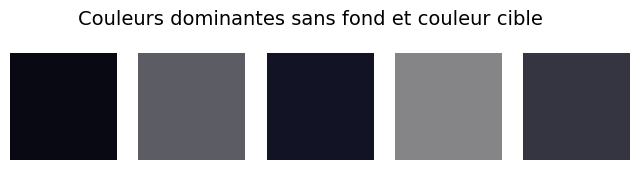

Couleurs RGB dominantes après suppression du fond et de la couleur cible :
[ 9  9 20]
[ 92  92 101]
[18 19 36]
[133 132 135]
[52 53 65]


In [11]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger l'image depuis une URL
url = 'https://www.miumiu.com/content/dam/miumiubkg_products/M/MMF/MMF950/16OOF0008/MMF950_16OO_F0008_S_OOO_SLF.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('RGB')
img = img.resize((200, 200))  # Redimensionne pour accélérer

# Convertir en tableau de pixels
pixels = np.array(img).reshape(-1, 3)

# Appliquer K-Means
k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)
colors = kmeans.cluster_centers_.astype(int)

# Trouver la couleur dominante, supposée être la couleur de fond
background_color = colors[0]

# Définir la couleur à supprimer (ici, [193, 181, 164])
target_color = np.array([193, 181, 164])

# Calculer la distance entre chaque pixel et la couleur de fond
distances_background = np.linalg.norm(pixels - background_color, axis=1)

# Calculer la distance entre chaque pixel et la couleur cible
distances_target = np.linalg.norm(pixels - target_color, axis=1)

# Définir un seuil pour considérer une couleur comme étant similaire au fond ou à la couleur cible
threshold = 50  # Vous pouvez ajuster ce seuil selon les besoins

# Filtrer les pixels qui sont similaires à la couleur de fond ou à la couleur cible
filtered_pixels = pixels[(distances_background > threshold) & (distances_target > threshold)]

# Appliquer à nouveau K-Means sur les pixels filtrés
kmeans_filtered = KMeans(n_clusters=k, random_state=0).fit(filtered_pixels)
filtered_colors = kmeans_filtered.cluster_centers_.astype(int)

# Afficher les couleurs dominantes après suppression des couleurs de fond et cibles
plt.figure(figsize=(8, 2))
for i, color in enumerate(filtered_colors):
    plt.subplot(1, k, i+1)
    plt.imshow([[color / 255]])
    plt.axis('off')
plt.suptitle("Couleurs dominantes sans fond et couleur cible", fontsize=14)
plt.show()

# Afficher les valeurs RGB des couleurs filtrées
print("Couleurs RGB dominantes après suppression du fond et de la couleur cible :")
for color in filtered_colors:
  print(np.round(color).astype(int))


/home/kajitha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kajitha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


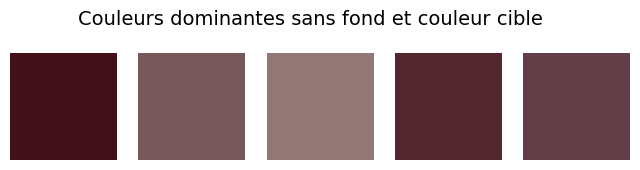

Couleurs RGB dominantes après suppression du fond et de la couleur cible :
[64 17 26]
[118  88  93]
[146 121 120]
[84 38 47]
[100  62  70]


In [12]:


# Charger l'image depuis une URL
url = 'https://www.miumiu.com/content/dam/miumiubkg_products/5/5X3/5X342E/069F0D27/5X342E_069_F0D27_F_B055_SLR.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('RGB')
img = img.resize((200, 200))  # Redimensionne pour accélérer

# Convertir en tableau de pixels
pixels = np.array(img).reshape(-1, 3)

# Appliquer K-Means
k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)
colors = kmeans.cluster_centers_.astype(int)

# Trouver la couleur dominante, supposée être la couleur de fond
background_color = colors[0]

# Définir la couleur à supprimer (ici, [193, 181, 164])
target_color = np.array([193, 181, 164])

# Calculer la distance entre chaque pixel et la couleur de fond
distances_background = np.linalg.norm(pixels - background_color, axis=1)

# Calculer la distance entre chaque pixel et la couleur cible
distances_target = np.linalg.norm(pixels - target_color, axis=1)

# Définir un seuil pour considérer une couleur comme étant similaire au fond ou à la couleur cible
threshold = 50  # Vous pouvez ajuster ce seuil selon les besoins

# Filtrer les pixels qui sont similaires à la couleur de fond ou à la couleur cible
filtered_pixels = pixels[(distances_background > threshold) & (distances_target > threshold)]

# Appliquer à nouveau K-Means sur les pixels filtrés
kmeans_filtered = KMeans(n_clusters=k, random_state=0).fit(filtered_pixels)
filtered_colors = kmeans_filtered.cluster_centers_.astype(int)

# Afficher les couleurs dominantes après suppression des couleurs de fond et cibles
plt.figure(figsize=(8, 2))
for i, color in enumerate(filtered_colors):
    plt.subplot(1, k, i+1)
    plt.imshow([[color / 255]])
    plt.axis('off')
plt.suptitle("Couleurs dominantes sans fond et couleur cible", fontsize=14)
plt.show()

# Afficher les valeurs RGB des couleurs filtrées
print("Couleurs RGB dominantes après suppression du fond et de la couleur cible :")
for color in filtered_colors:
  print(np.round(color).astype(int))

In [7]:
import pandas as pd
df = pd.read_csv("produits_final.csv")
df["rgb_dominant"]= df["image"].apply(get_dominant_colors)
df.to_csv("produits_final.csv", index=False)

In [8]:
print(df["rgb_dominant"][:5])

0    [[216, 225, 229], [36, 19, 18], [212, 221, 225...
1    [[212, 221, 225], [29, 19, 19], [18, 12, 12], ...
2    [[217, 226, 230], [213, 222, 226], [31, 20, 17...
3    [[224, 233, 235], [222, 229, 233], [212, 215, ...
4    [[212, 221, 225], [34, 55, 102], [28, 47, 92],...
Name: rgb_dominant, dtype: object


In [ ]:
def get_dominant_colors(image_url, k=5, threshold=50):
    # Charger l'image depuis l'URL
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    img = img.resize((200, 200))  # Redimensionne pour accélérer

    # Convertir en tableau de pixels
    pixels = np.array(img).reshape(-1, 3)

    # Appliquer K-Means pour extraire les couleurs dominantes
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)
    colors = kmeans.cluster_centers_.astype(int)

    # Filtrage des couleurs similaires à la couleur de fond et la couleur cible
    background_color = colors[0]
    target_color = np.array([193, 181, 164])  # Couleur à supprimer

    # Calculer la distance entre chaque pixel et les couleurs
    distances_background = np.linalg.norm(pixels - background_color, axis=1)
    distances_target = np.linalg.norm(pixels - target_color, axis=1)

    # Filtrer les pixels similaires
    filtered_pixels = pixels[(distances_background > threshold) & (distances_target > threshold)]

    # Appliquer à nouveau K-Means sur les pixels filtrés
    kmeans_filtered = KMeans(n_clusters=k, random_state=0).fit(filtered_pixels)
    filtered_colors = kmeans_filtered.cluster_centers_.astype(int)

    return filtered_colors

In [102]:
df = pd.read_csv("produits_final.csv")

def get_dominant_colors(image_url, k=5, threshold=50, min_distance=40):
    # Charger l'image
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    img = img.resize((200, 200))

    pixels = np.array(img).reshape(-1, 3)

    # KMeans initial
    kmeans = KMeans(n_clusters=k*2, random_state=0).fit(pixels)
    colors = kmeans.cluster_centers_.astype(int)

    # Couleurs de fond et cible
    background_color = colors[0]
    target_color = np.array([193, 181, 164])

    # Filtrage
    distances_background = np.linalg.norm(pixels - background_color, axis=1)
    distances_target = np.linalg.norm(pixels - target_color, axis=1)

    filtered_pixels = pixels[(distances_background > threshold) & (distances_target > threshold)]

    # Si plus aucun pixel → revenir aux pixels d'origine
    if len(filtered_pixels) == 0:
        filtered_pixels = pixels

    # KMeans sur les pixels (filtrés ou pas)
    n_clusters = min(k*2, len(filtered_pixels))
    kmeans_filtered = KMeans(n_clusters=n_clusters, random_state=0).fit(filtered_pixels)

    filtered_colors = kmeans_filtered.cluster_centers_.astype(int)

    # Garder les couleurs bien distinctes
    distinct_colors = []
    for color in filtered_colors:
        if all(np.linalg.norm(color - np.array(c)) >= min_distance for c in distinct_colors):
            distinct_colors.append(color)
        if len(distinct_colors) == k:
            break

    return np.array(distinct_colors)



# Appliquer la fonction d'extraction sur chaque image
df['dominant_colors'] = df['image'].apply(get_dominant_colors)


df.to_csv("produits_final.csv", index=False)

/home/kajitha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kajitha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kajitha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kajitha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

In [4]:
pip install webcolors

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import webcolors

def rgb_to_name(rgb):
    try:
        return webcolors.rgb_to_name(rgb)
    except ValueError:
        return None  # Retourne None si la couleur n'a pas de nom exact
        

In [6]:
df = pd.read_csv("produits_final.csv")

In [9]:


def parse_rgb_string(rgb_str):
    try:
        return ast.literal_eval(rgb_str)
    except (ValueError, SyntaxError):
        return None


In [11]:
df['rgb_dominant'] = df['dominant_colors'].apply(lambda color_list: [parse_rgb_string(color) for color in color_list])
df.to_csv("produits_final.csv", index=False)


In [15]:

df.to_csv("produits_final.csv", index=False)

In [103]:

def parse_dominant_colors(color_str):
    try:
        # Supprimer les crochets et convertir la chaîne en tableau NumPy
        color_str = color_str.replace('[', '').replace(']', '')
        color_values = np.fromstring(color_str, sep=' ', dtype=int)
        # Reshaper en tableau de Nx3
        return color_values.reshape(-1, 3)
    except Exception as e:
        print(f"Erreur lors de la conversion : {e}")
        return None

In [106]:
df['dominant_colors_array'].head()

0    None
1    None
2    None
3    None
4    None
Name: dominant_colors_array, dtype: object

In [22]:
df['color_name'] = df['dominant_color'].apply(lambda x: rgb_to_name(x) if x is not None else None)


In [107]:


def closest_color(requested_color):
    min_distance = float('inf')
    closest_name = None

    for name in webcolors.names("css3"):
        r_c, g_c, b_c = webcolors.name_to_rgb(name)
        distance = sum((c1 - c2) ** 2 for c1, c2 in zip(requested_color, (r_c, g_c, b_c)))
        if distance < min_distance:
            min_distance = distance
            closest_name = name
    return closest_name


In [108]:
df['color_names'] = df['dominant_colors'].apply(
    lambda color_list: [closest_color(tuple(rgb)) for rgb in color_list if rgb is not None]
)

In [110]:
print(df['color_names'].head())


0            [gainsboro, darkslategray, gray, dimgray]
1    [black, lightslategray, dimgray, lightsteelblu...
2                 [black, gray, darkslategray, maroon]
3         [gainsboro, dimgray, dimgray, darkslategray]
4             [saddlebrown, gray, black, sienna, gray]
Name: color_names, dtype: object


In [51]:



def parse_and_name_colors(raw_colors):
    try:

        color_array = np.array(ast.literal_eval(raw_colors))
        return [closest_color(tuple(rgb)) for rgb in color_array]
    except Exception as e:
        return None


In [111]:

df.to_csv("produits_final.csv", index=False)


In [120]:

def safe_to_list(x):
    if isinstance(x, list):
        return x
    elif isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return [x]  
    else:
        return [x]

# Appliquer la conversion aux deux colonnes
df['couleurs'] = df['couleurs'].apply(safe_to_list)
df['color_names'] = df['color_names'].apply(safe_to_list)

# Fusionner les listes
df['color_names'] = df.apply(lambda row: row['couleurs'] + row['color_names'], axis=1)



In [122]:
df.to_csv("produits_final.csv", index=False)


In [125]:
from collections import Counter


toutes_les_couleurs = [couleur for liste in df['couleurs_fusionnées'] for couleur in liste]

compteur = Counter(toutes_les_couleurs)

df_couleurs = pd.DataFrame(compteur.items(), columns=['couleur', 'count']).sort_values(by='count', ascending=False)

print(df_couleurs)

           couleur  count
3             gray    192
2    darkslategray    178
4          dimgray    154
6            black    111
21  darkolivegreen     82
..             ...    ...
55           corde      1
57        nénuphar      1
90       goldenrod      1
58             bis      1
59           rubis      1

[118 rows x 2 columns]


In [123]:

df['color_names_str'] = df['color_names'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
color_counts = df.groupby(['type', 'color_names_str']).size().reset_index(name='count')
print(color_counts)


           type                                    color_names_str  count
0    Accessoire         chêne, sienna, gray, darkolivegreen, black      1
1    Accessoire  fuchsia, mediumvioletred, palevioletred, brown...      1
2    Accessoire         gris, gray, black, darkolivegreen, dimgray      1
3    Accessoire           noir, darkslategray, gray, darkslategray      1
4    Accessoire  vanille, vanille, darkkhaki, peru, saddlebrown...      1
..          ...                                                ...    ...
234       Veste          rose, lightpink, rosybrown, brown, sienna      1
235       Veste  rouge, jaune, amarante, lin, maïs, gray, maroo...      1
236       Veste  tabac, blé, tabac, saddlebrown, gray, black, s...      1
237       Veste  vert, doré, dorés, olive, gray, darkolivegreen...      1
238       Veste          vert, olive, gray, maroon, dimgray, black      1

[239 rows x 3 columns]


In [126]:
# Créer une liste de tuples (type, couleur)
type_couleur_pairs = [
    (row['type'], couleur)
    for _, row in df.iterrows()
    for couleur in row['couleurs_fusionnées']
]

# Compter les occurrences de chaque (type, couleur)
compteur = Counter(type_couleur_pairs)

# Transformer en DataFrame
df_compte = pd.DataFrame([
    {'type': t, 'couleur': c, 'count': n}
    for (t, c), n in compteur.items()
]).sort_values(by=['type', 'count'], ascending=[True, False])

print(df_compte)

           type         couleur  count
250  Accessoire            gray      4
172  Accessoire       darkkhaki      3
173  Accessoire            peru      3
174  Accessoire     saddlebrown      3
252  Accessoire  darkolivegreen      3
..          ...             ...    ...
641       Veste           rouge      1
642       Veste           jaune      1
643       Veste        amarante      1
644       Veste            maïs      1
645       Veste       lightgray      1

[690 rows x 3 columns]


In [130]:
print(df[['dominant_colors_array', 'dominant_colors', 'color_names']].head())

  dominant_colors_array                                    dominant_colors  \
0                  None  [[231, 227, 218], [70, 70, 81], [120, 119, 124...   
1                  None  [[18, 18, 27], [133, 153, 179], [84, 84, 89], ...   
2                  None  [[13, 15, 24], [124, 118, 116], [78, 73, 73], ...   
3                  None  [[231, 227, 219], [100, 93, 83], [124, 117, 10...   
4                  None  [[92, 47, 28], [141, 115, 100], [56, 23, 8], [...   

                                         color_names  
0    [bleu, gainsboro, darkslategray, gray, dimgray]  
1  [bleu, lin, black, lightslategray, dimgray, li...  
2         [bleu, black, gray, darkslategray, maroon]  
3  [blanc, doré, gainsboro, dimgray, dimgray, dar...  
4  [tabac, blé, tabac, saddlebrown, gray, black, ...  


In [135]:
df.to_csv("produits_final.csv", index=False)
